# Branching Process with Superspreading Events

# Tasks:
    - Include probability of case ascertainment   ✅
    - Add simulation of Branching Process  ✅


In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
import datetime

%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});


UsageError: Line magic function `%%javascript` not found.


In [2]:
current_date = datetime.date(2020, 2, 27)
buffer = 7

In [3]:
data_by_countries = pd.read_csv('bycountries_27Feb2020.csv')
data_by_countries.rename(columns = {'Unnamed: 0' : "Country"}, inplace = True)
data_by_countries['Imported']  = data_by_countries['ImportedChina'] + data_by_countries['ImportedOthers']
data_by_countries.drop(["ImportedChina", "ImportedOthers"], axis = 1, inplace = True)
# data_by_countries



In [4]:
data_daily_cases = pd.read_csv('dailycases_international_27Feb2020.csv')
data_daily_cases_countries = data_daily_cases["Daily new"][3:]
country_list = [c for c in data_daily_cases_countries]

daily_counts = (data_daily_cases.iloc[2:, 2:].T)#.apply(pd.to_numeric)
daily_counts.columns = ["date"] + country_list
daily_counts = daily_counts.fillna(0)
daily_counts.loc['0.1', 'China'] = '+119' # Typo in a single entry
daily_counts.replace(',','', regex=True, inplace=True)
daily_counts.iloc[:64, 1:] = daily_counts.iloc[:64, 1:].apply(pd.to_numeric)



dates = [datetime.date(2020, 1, 13) + datetime.timedelta(days = i) for i in range(len(daily_counts))]
daily_counts['date'] = dates
daily_counts = daily_counts.set_index('date')

last_count_idxs = [daily_counts[country].to_numpy().nonzero()[-1][-1] for country in country_list]

latest_dates = [dates[idx] for idx in last_count_idxs]
latest_dates = pd.DataFrame(latest_dates, index = country_list, columns = ["LatestDate"])



buffer_delta = datetime.timedelta(days = buffer)

bufferdays= [current_date - buffer_delta + datetime.timedelta(days = i+1) for i in range(buffer)]

ongoing_branches = daily_counts.loc[bufferdays].sum(axis = 0)
latest_dates_by_countries = latest_dates.loc[data_by_countries['Country']]
ongoing_branches_by_countries = ongoing_branches.loc[data_by_countries['Country']]
data_by_countries["latestdate"] = latest_dates_by_countries.LatestDate.values
data_by_countries["ongoingbranches"] = ongoing_branches_by_countries.values
data_by_countries['isextinct'] = data_by_countries.latestdate < current_date - buffer_delta
# zero_imports_country_list = data_by_countries.loc[data_by_countries['Imported']==0].Country.to_list()
# data_by_countries['Imported'] = data_by_countries['Imported'].replace({0:1})
data_by_countries 




,Country,Total,Local,Unknown,Death,Imported,latestdate,ongoingbranches,isextinct
0,South Korea,1766,605,1144,13,17,2020-03-17,1662,False
1,Japan,186,129,18,3,39,2020-03-17,107,False
2,Singapore,93,69,0,0,24,2020-03-17,11,False
3,Australia,23,3,0,0,20,2020-03-04,8,False
4,Malaysia,22,2,0,0,20,2020-03-17,1,False
5,Vietnam,16,8,0,0,8,2020-02-13,0,True
6,Philippines,3,0,0,1,3,2020-02-05,0,True
7,Cambodia,1,0,0,0,1,2020-01-30,0,True
8,Thailand,40,7,10,0,23,2020-03-02,5,False
9,India,3,0,0,0,3,2020-03-17,0,False


In [5]:
data_daily_cases = pd.read_csv('dailycases_international_27Feb2020.csv')
data_daily_cases_countries = data_daily_cases["Daily new"][3:]
country_list = [c for c in data_daily_cases_countries]

daily_counts = (data_daily_cases.iloc[2:, 2:].T)#.apply(pd.to_numeric)
daily_counts.columns = ["date"] + country_list
daily_counts = daily_counts.fillna(0)
daily_counts.loc['0.1', 'China'] = '+119' # Typo in a single entry
daily_counts.replace(',','', regex=True, inplace=True)
daily_counts.iloc[:64, 1:] = daily_counts.iloc[:64, 1:].apply(pd.to_numeric)


date_list = list(pd.date_range(start=datetime.date(2020, 1, 13),end=current_date).to_pydatetime())
dates = [datetime.date(2020, 1, 13) + datetime.timedelta(days = i) for i in range(len(daily_counts))]

daily_counts['date'] = dates
daily_counts = daily_counts[daily_counts['date'] <= current_date]
daily_counts = daily_counts.set_index('date')

last_count_idxs = [daily_counts[country].to_numpy().nonzero()[-1] for country in country_list]
last_count_idxs = [lci[-1] if len(lci) !=0 else -1 for lci in last_count_idxs]

latest_dates = [dates[idx] for idx in last_count_idxs]
latest_dates = pd.DataFrame(latest_dates, index = country_list, columns = ["LatestDate"])



buffer_delta = datetime.timedelta(days = buffer)

bufferdays= [current_date - buffer_delta + datetime.timedelta(days = i+1) for i in range(buffer)]

ongoing_branches = daily_counts.loc[bufferdays].sum(axis = 0)
latest_dates_by_countries = latest_dates.loc[data_by_countries['Country']]
ongoing_branches_by_countries = ongoing_branches.loc[data_by_countries['Country']]
data_by_countries["latestdate"] = latest_dates_by_countries.LatestDate.values
data_by_countries["ongoingbranches"] = ongoing_branches_by_countries.values
data_by_countries['isextinct'] = data_by_countries.latestdate < current_date - buffer_delta
# data_by_countries

## Total Progeny for a Branching Process

[Dwass (1969)](https://www.jstor.org/stable/3212112) provides a formula for the total progeny of a Branching Process that begins with $a$ initial particles. Let the number of particles in each generation be given by $Z_0, Z_1, \dots Z_n, \dots$, so that $Z_0 = a$. If $P(s)$ is the probability generating function of the offspring distribution, with 

\begin{equation}
[P(s)]^a = p_0^{(a)} + p_1^{(a)}s + \dots + p_n^{(a)}s^n + \dots,
\end{equation}

then the probability that the total progeny $X$ of the branching process is $x$ is given by:

\begin{equation}
{\mathrm{P}}(X = x | Z_0 = a) = \frac{a}{x}p_{x-a}^{(x)} \label{Dwass_formula}
\end{equation}

## Negative Binomial Likelihood

We assume that the offspring distribution (i.e. the distribution of the number of people, $Y$ infected by a single case over the duration of their infectious period) for the branching process follows a Negative Binomial Distribution with parameters $p$ and $k$. We may write the probability generating function for the offspring distribution, $G_Y(s)$ as:

\begin{equation}
G_Y(s; k, p) = \left(\frac{1-p}{1-ps}\right)^{k}. \label{Qdef_NegBin}
\end{equation}

Letting $p = 1 - \left(1 + \frac{R_0}{k}\right)^{-1}$, we may write \eqref{Qdef_NegBin} as:

\begin{equation}
G_Y(s; k, R_0) = \left(1 + \frac{R_0}{k}(1-s) \right)^{-k}. \label{Qdef_R0}
\end{equation}

Using this distribution in \eqref{Dwass_formula}, we obtain the probability that the total progeny of the branching process X has:

\begin{equation}
{\mathrm{P}}(X = x | Z_0 = a) = \frac{ka}{ka + x - a} \binom{ka + x - a}{x-a}\frac{\left(\frac{R_0}{k}\right)^{x-a}}{\left(1 + \frac{R_0}{k}\right)^{ka+x-a}}. \label{Total_progeny}
\end{equation}

## Case Ascertainment

Now, suppose that for every infectious case there is a probability $\pi$ of observing an individual infected by that case. We define the random variable $\tilde{Y}$, which is the number of **observed** secondary cases infected by an individual over the course of their infectious period. We have that $\tilde{Y} = \sum_{i=1}^Y B_i$, where the $B_i$ are i.i.d Bernoulli random variables with distribution $B \sim {\text{Bernoulli}}(\pi)$.   

The probability generating function of $\tilde{Y}$ is given by:
\begin{align}
G_{\tilde{Y}}(s) = G_Y(G_B(s)) &= \left(\frac{1 - \tilde{p}}{1 - \tilde{p}s} \right)^k, \label{Observed_offspring} \\ 
{\text{where}} \quad \tilde{p} &= \frac{\pi p}{1 - p + \pi p}. \label{Observed_p}
\end{align}
<br>
Replacing $p$ with $\tilde{p}$ gives an adjusted value of $R_0$ given by $\tilde{R}_0 = k\left(\frac{\tilde{p}}{1-\tilde{p}}\right)$. Substituting $\tilde{R}_0$ into \eqref{Total_progeny} gives the total progeny given case under-ascertainment, which we denote by $\tilde{X}$. We then use maximum-likelihood to fit values of $k$ given data $\tilde{X}_i$, $\tilde{R}_0$ and $a$





In [415]:
def Negative_Binomial_Likelihood(k, p, r, icases):

    totals = k + icases
    ll = np.log(icases) +np.log(sp.special.binom(totals + r - (icases+1), totals - icases))  - np.log(totals) + (totals-1)*np.log(1-p) + r*np.log(p)
    return np.sum(ll[~np.isnan(ll)])

def Negative_Binomial_Likelihood_Blumberg(k, R0, r, icases):
    tcases = k + icases
    ll = np.log(r) + np.log(icases) - np.log((r+1)*tcases-icases) + np.log(sp.special.binom((r+1)*tcases - icases, tcases - icases)) +(tcases-icases)*(np.log(R0)-np.log(r))-((r+1)*tcases-icases)*np.log(1+R0/r)
    return np.sum(ll[~np.isnan(ll) & ~np.isinf(ll)])

def nll_derivative_r(r, k, icases = 1):
    N = len(k)
    nll_derivative = np.sum(sp.special.digamma(k+r-icases)) - N*sp.special.digamma(r) + N*np.log(r/(r + np.mean(k-icases)))
    return nll_derivative

def Negative_Binomial_Likelihood_truncated(k, p, r, icases): 
    assert(len(k) == len(icases)),  print(k, icases)
    N = len(icases) 
    ll = 0
    for i in range(N):
        lprob = 0
        if (icases[i] == 0 or k[i] == 0):
            continue
        for x in range(k[i]):
            ll_extinct = Negative_Binomial_Likelihood_Blumberg(x, p, r, icases = icases[i])
            if lprob<ll_extinct:
                lprob = - np.inf
                break
            lprob += np.log(1 - np.exp((ll_extinct - lprob)))
#             lprob += np.exp(ll_extinct)
        if not np.isnan(lprob):
            ll += lprob
#             ll+=np.log(1-lprob)
            
    assert(not np.isnan(ll)), ll
    return ll

def Negative_Binomial_Likelihood_total(params, k, icases, isextinct):
#     r, p = params[0], (1+params[1]/params[0])**(-1)
    r, p = params[0], params[1]
    k_ongoing = k[~isextinct]
    i_ongoing = icases[~isextinct]
    ll = Negative_Binomial_Likelihood_Blumberg(k[isextinct], p, r, icases[isextinct]) + Negative_Binomial_Likelihood_truncated(k_ongoing, p, r, i_ongoing)
    return -ll

def p_with_ascertainment(p, pi=1):
    return pi*p/(1-p*(1-pi))

def R0_from_p(p, r):
    return (1/p - 1)*r

def Negative_Binomial_Likelihood_total_R0(r, R0, k, icases, isextinct, pi = 1):
    r=1/r
    q = (1 + R0/r)**(-1)
    p = p_with_ascertainment(q, pi)
    R0 = R0_from_p(p, r)
#     print(R0)
    k_ongoing = k[~isextinct]
    i_ongoing = icases[~isextinct]
    ll = Negative_Binomial_Likelihood_Blumberg(k[isextinct], R0, r, icases[isextinct]) + Negative_Binomial_Likelihood_truncated(k_ongoing, R0, r, i_ongoing)
    return -ll


In [416]:
local_cases = data_by_countries["Local"].values
imports = data_by_countries["Imported"].values
isextinct = data_by_countries['isextinct'].values
# r_hat = sp.optimize.root(nll_derivative_r, x0 = 0.1, args = (totals, imports), method = 'krylov')
# r_hat
# max_likelihood_p(r_hat.x, totals, imports)
param_hats = sp.optimize.minimize(Negative_Binomial_Likelihood_total, x0 = np.array((0.1, 2)), args = (local_cases, imports, isextinct), method = 'SLSQP')
param_hats



/var/folders/79/4z64_xmd40z0hjlyywtt5xfm0000gn/T/ipykernel_84941/1201417120.py:9: RuntimeWarning: divide by zero encountered in log
  ll = np.log(r) + np.log(icases) - np.log((r+1)*tcases-icases) + np.log(sp.special.binom((r+1)*tcases - icases, tcases - icases)) +(tcases-icases)*(np.log(R0)-np.log(r))-((r+1)*tcases-icases)*np.log(1+R0/r)


     fun: 12.015988735661086
     jac: array([-8.59236717e-03, -5.43594360e-05])
 message: 'Optimization terminated successfully'
    nfev: 33
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.07775211, 3.41076569])

In [417]:
n = 20
pi = 0.4 # ascertainment probability
R0s = np.linspace(0.5, 4, num = n)
rvec = np.zeros(n)
rvec_control = np.zeros_like(rvec)
for j in tqdm(range(n)):
    rinv_hat = sp.optimize.minimize(Negative_Binomial_Likelihood_total_R0, x0 = 20, args = (R0s[j], local_cases, imports, isextinct, pi), method = "SLSQP")
    rvec[j] = 1/rinv_hat.x
    rinv_hat_control = sp.optimize.minimize(Negative_Binomial_Likelihood_total_R0, x0 = 20, args = (R0s[j], local_cases, imports, isextinct, 1), method = "SLSQP")
    rvec_control[j] = 1/rinv_hat_control.x


# rhat*(1-phat)/phat



  0%|                                                    | 0/20 [00:00<?, ?it/s]/var/folders/79/4z64_xmd40z0hjlyywtt5xfm0000gn/T/ipykernel_84941/1201417120.py:55: RuntimeWarning: invalid value encountered in reciprocal
  q = (1 + R0/r)**(-1)
/var/folders/79/4z64_xmd40z0hjlyywtt5xfm0000gn/T/ipykernel_84941/1201417120.py:9: RuntimeWarning: divide by zero encountered in log
  ll = np.log(r) + np.log(icases) - np.log((r+1)*tcases-icases) + np.log(sp.special.binom((r+1)*tcases - icases, tcases - icases)) +(tcases-icases)*(np.log(R0)-np.log(r))-((r+1)*tcases-icases)*np.log(1+R0/r)
/var/folders/79/4z64_xmd40z0hjlyywtt5xfm0000gn/T/ipykernel_84941/1201417120.py:9: RuntimeWarning: invalid value encountered in log
  ll = np.log(r) + np.log(icases) - np.log((r+1)*tcases-icases) + np.log(sp.special.binom((r+1)*tcases - icases, tcases - icases)) +(tcases-icases)*(np.log(R0)-np.log(r))-((r+1)*tcases-icases)*np.log(1+R0/r)
/var/folders/79/4z64_xmd40z0hjlyywtt5xfm0000gn/T/ipykernel_84941/1201417120.py:

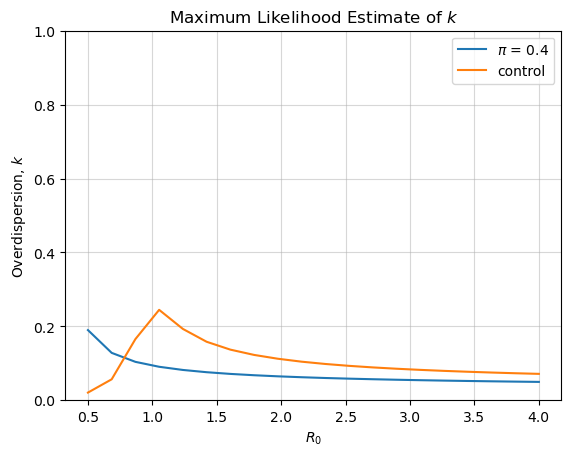

In [498]:
plt.grid(alpha = 0.5)
plt.plot(R0s, rvec, label = r'$\pi$ = ' + str(pi))
plt.plot(R0s, rvec_control, label = 'control')
plt.xlabel(r'$R_0$')
plt.ylabel("Overdispersion, " + r'$k$')
plt.ylim([0, 1])
plt.legend()
# plt.show()
plt.title("Maximum Likelihood Estimate of " + r'$k$')
plt.savefig("k_estimate_comparison_pi=" + str(pi) + ".png")
plt.savefig("k_estimate_comparison_pi=" + str(pi) + ".pdf")

In [506]:

p_ascertainment = p_with_ascertainment((1 + R0s/rvec)**(-1), pi)
R0_ascertainment = R0_from_p(p_ascertainment, rvec)


phats_df = pd.DataFrame(np.array((np.round(R0s, 2), np.round(rvec, 4), np.round(p_ascertainment, 4), np.round(R0_ascertainment, 2))).T, columns = ["R0 (observed)", "k (MLE)", "p", "R0 (true)"])

phats_df.set_index("R0 (observed)")
phats_df.to_csv("phats_df.csv")
phats_df

,R0 (observed),k (MLE),p,R0 (true)
0,0.50,0.1900,0.1320,1.25
1,0.68,0.1284,0.0698,1.71
2,0.87,0.1041,0.0458,2.17
3,1.05,0.0908,0.0333,2.63
4,1.24,0.0822,0.0259,3.09
5,1.42,0.0761,0.0210,3.55
6,1.61,0.0715,0.0175,4.01
7,1.79,0.0679,0.0149,4.47
8,1.97,0.0649,0.0130,4.93
9,2.16,0.0625,0.0115,5.39


In [420]:
# Transmission Parameters 

beta = 0.8/10
gamma = 1/10
Reff = beta/gamma # Effective reproduction number


omega = beta + gamma # Average lifetime of infectious case
r = beta - gamma # Growth rate 
rho = omega

r = 1/10 # Dispersion Parameter for Negative Binomial - r=-1 returns the usual binary fission
         # offspring distribution (\beta*s^2 + \gamma)

ntime = 100000
Tmax = 100
time = np.linspace(0, Tmax, ntime)
dtime = np.diff(time)[0]

# Initial conditions for probability of extinction and moment equations

q0 = 0
m0 = 1
m2_0 = 1

# Colour map

cmap = sns.color_palette("Set2")





In [421]:
beta, gamma

(0.08, 0.1)

In [422]:
def Offspring(s, beta, gamma, r):
    return 1/(beta + gamma) * (beta*(s*(1 + (1/r)*(1-s))**(-r)) + gamma)
#     R0 = beta/gamma
#     return (1 + ((R0)/r)*(1-s))**(-r)

def Offspring1(s, beta, gamma, r):
    return (1/(beta + gamma)) * (beta*(s**2) + gamma)

def q_deriv(u, t, beta, gamma, r):
    return (Offspring(u, beta, gamma, r) - u)

def q_deriv1(u, t, beta, gamma, r):
    return (Offspring1(u, beta, gamma, r) - u)


u1 = beta - gamma

u2 = (2 + (u1+1)/u1)*beta 

def mean_deriv(u, t, u1):
    return u1*u

def m2_deriv(u, t, u1, u2):
    return u2 * np.exp(2*u1*t) + u1 * u



q = sp.integrate.odeint(q_deriv, q0, time, args = (beta, gamma, r))

mean = sp.integrate.odeint(mean_deriv, m0, time, args = (u1,))

moment_2 = sp.integrate.odeint(m2_deriv, m2_0, time, args = (u1, u2))

var = moment_2 - mean**2
q_grad = np.gradient(q.flatten(), dtime)
tstar_q = np.where(q_grad<=1e-3)[0][0]
var_coeff = np.sqrt(var)/(mean)
var_coeff_grad =  np.gradient(var_coeff.flatten(), dtime)
tstar_var_coeff = np.where(var_coeff_grad<=1e-0)[0][0]

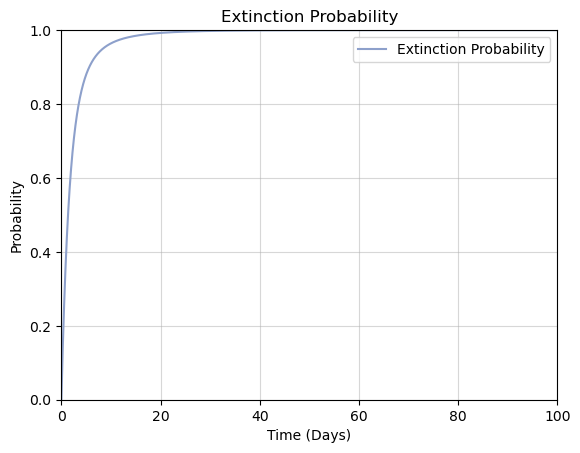

In [423]:

plt.figure(3)
plt.plot(time, q, label = "Extinction Probability", color = cmap[2])
# plt.plot(time, var_coeff, label = "Coefficient of Variation", color = cmap[1])
plt.grid(alpha = 0.5)
# plt.axvline(time[tstar_var_coeff], color = cmap[1], linestyle = '--', label = "T2*")
# plt.axvline(time[tstar_q], color = cmap[2], linestyle = '--', label = "T1*")
# plt.axvline(time[np.max((tstar_q, tstar_var_coeff))] , color = 'tab:red', linestyle = '--', label = "T*")
plt.title("Choice of " + r'$T^*$')
plt.title("Extinction Probability")
plt.xlabel("Time (Days)")
plt.ylabel("Probability")
plt.xlim([0, Tmax])
plt.ylim([0, 1])
plt.legend()
plt.show()


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 12.82it/s]


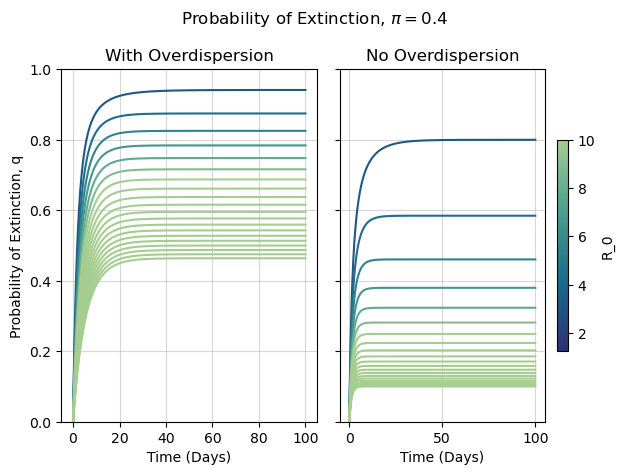

<Figure size 640x480 with 0 Axes>

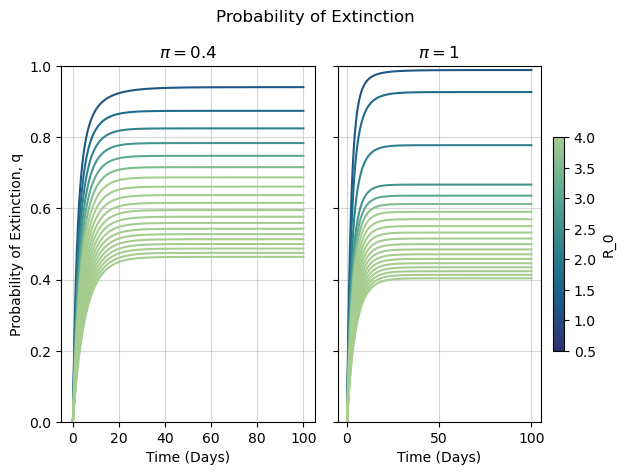

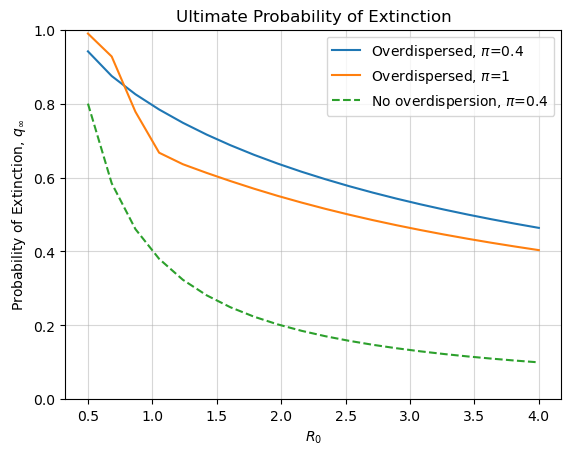

In [502]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

qmat = np.zeros((n, len(time)))
qmat1 = np.zeros_like(qmat)
qmat_control = np.zeros_like(qmat)
mean_mat = np.zeros_like(qmat)
var_mat = np.zeros_like(qmat)
var_coeff_mat = np.zeros_like(qmat)
plt.figure(1)
fig, ax = plt.subplots(1, 2, sharey = True)
# plt.figure(1)
ax[0].grid(alpha = 0.5)
ax[1].grid(alpha = 0.5)

plt.figure(2)
fig1, ax1 = plt.subplots(1, 2, sharey = True)
ax1[0].grid(alpha = 0.5)
ax1[1].grid(alpha = 0.5)


# plt.figure(3)
# plt.grid(alpha = 0.5)

normalize = mcolors.Normalize(min(R0s), max(R0s))
normalize1 = mcolors.Normalize(min(R0_ascertainment), max(R0_ascertainment))
cmp = sns.color_palette("crest_r", as_cmap=True)


for i, R0 in enumerate(tqdm(R0_ascertainment)):
    beta = R0*gamma
    r = rvec[i]
    r_control = rvec_control[i]
    u1 = beta - gamma
    u2 = (2 + (r+1)/r)*beta 
    
    q = sp.integrate.odeint(q_deriv, q0, time, args = (beta, gamma, r)).flatten()
    qmat[i, :] = q
    q1 = sp.integrate.odeint(q_deriv1, q0, time, args = (beta, gamma, r)).flatten()
    qmat1[i, :] = q1
    q_control = sp.integrate.odeint(q_deriv, q0, time, args = (beta, gamma, r_control)).flatten()
    qmat_control[i, :] = q_control
    
    mean = sp.integrate.odeint(mean_deriv, m0, time, args = (u1,)).flatten()
    mean_mat[i, :] = mean

    moment_2 = sp.integrate.odeint(m2_deriv, m2_0, time, args = (u1, u2)).flatten()
    var = moment_2 - mean**2
    var_mat[i, :] = var
    
    var_coeff_mat[i, :] = np.sqrt(var)/mean
    
    plt.figure(1)
    ax[0].plot(time, q, color = cmp(normalize(R0)))
    ax[1].plot(time, q_control, color = cmp(normalize(R0)))
    plt.figure(2)
    ax1[0].plot(time, q, color = cmp(normalize(R0)))
    ax1[1].plot(time, q1, color = cmp(normalize(R0)))
    
    
    
#     plt.figure(3)
#     plt.plot(time, q1, color = cmp(normalize(R0)))
    
    
plt.figure(1)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmp)
scalarmappaple.set_array(R0s)
cbar = fig.colorbar(scalarmappaple, shrink = 0.6)
cbar.set_label(r'R_0')
ax[0].set_xlabel('Time (Days)')
ax[1].set_xlabel('Time (Days)')
ax[0].set_ylabel("Probability of Extinction, q")
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])
ax[0].set_title(r'$\pi = $' + str(pi))
ax[1].set_title(r'$\pi = $' + str(1))
fig.suptitle("Probability of Extinction")
ax[0].label_outer()
ax[1].label_outer()
# plt.title("Probability of extinction, " + r'$\pi=$' + str(pi))
fig.tight_layout()
fig.savefig("p_extinction_pi=" + str(pi) + ".pdf")
fig.savefig("p_extinction_pi=" + str(pi) + ".png")


plt.figure(2)
scalarmappaple1 = cm.ScalarMappable(norm=normalize1, cmap=cmp)
scalarmappaple1.set_array(R0_ascertainment)
cbar1 = fig1.colorbar(scalarmappaple1, shrink = 0.6)
cbar1.set_label(r'R_0')
ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel("Probability of Extinction, q")
ax1[0].set_ylim([0, 1])
ax1[1].set_ylim([0, 1])
ax1[0].set_title("With Overdispersion")
ax1[1].set_title("No Overdispersion")
fig1.suptitle("Probability of Extinction, " + r'$\pi = 0.4$')
ax1[0].label_outer()
ax1[1].label_outer()
# plt.title("Probability of extinction, " + r'$\pi=$' + str(pi))
fig1.tight_layout()
fig1.savefig("p_extinction_no_overdispersion.pdf")
fig1.savefig("p_extinction_no_overdispersion.png")



# plt.figure(3)
# plt.grid(alpha = 0.5)
# scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmp)
# scalarmappaple.set_array(R0s)
# plt.colorbar(scalarmappaple)
# plt.xlabel('Time (Days)')
# plt.ylabel("Probability of Extinction, q")
# plt.ylim([0, 1])
# plt.title("Probability of extinction, no overdispersion")
# plt.savefig("p_extinction_control.pdf")
# plt.savefig("p_extinction_control.png")

plt.figure(4)
plt.grid(alpha = 0.5)
plt.plot(R0s, qmat[:, -1], label = "Overdispersed, " +  r'$\pi$' + '=' + str(pi) )
plt.plot(R0s, qmat_control[:, -1], label = "Overdispersed, " +  r'$\pi$' + '=' + str(1))
plt.plot(R0s, qmat1[:, -1], label = "No overdispersion, " +  r'$\pi$' + '=' + str(pi), linestyle = '--')
plt.ylim([0, 1])
plt.title("Ultimate Probability of Extinction")
plt.xlabel(r'$R_0$')
plt.ylabel("Probability of Extinction, " + r'$q_\infty$')
plt.legend()
# plt.savefig("Ultimate_p_extinction.pdf")
# plt.savefig("Ultimate_p_extinction.png")


plt.show()


In [499]:
qmat

array([[0.00000000e+00, 4.44313841e-04, 8.88357657e-04, ...,
        9.41414098e-01, 9.41414098e-01, 9.41414099e-01],
       [0.00000000e+00, 3.68839359e-04, 7.37486021e-04, ...,
        8.74761577e-01, 8.74761577e-01, 8.74761577e-01],
       [0.00000000e+00, 3.15282623e-04, 6.30418822e-04, ...,
        8.25403947e-01, 8.25403947e-01, 8.25403947e-01],
       ...,
       [0.00000000e+00, 9.92063570e-05, 1.98390025e-04, ...,
        4.87233060e-01, 4.87233060e-01, 4.87233060e-01],
       [0.00000000e+00, 9.48717367e-05, 1.89722255e-04, ...,
        4.75200214e-01, 4.75200214e-01, 4.75200214e-01],
       [0.00000000e+00, 9.09000460e-05, 1.81780186e-04, ...,
        4.63851135e-01, 4.63851135e-01, 4.63851135e-01]])

In [155]:
idx = 2

class Gillespie_NegBin:
    def __init__(self, t0, initial_states, rates, transitions, params):
        self.t0 = t0
        self.initial_states = initial_states
        self.rates = rates
        self.transitions = transitions
        self.params = params
        return None
    
    def trajectory(self, nevents = int(1e6), stop_time = None, stop_cases = None):
        t0, initial_states, rates = self.t0, self.initial_states, self.rates
        transitions, params = self.transitions, self.params
        rands = np.random.random(2*nevents).reshape((2, nevents))
        results = np.zeros((2, nevents))
        t = t0
        single_type = results.shape[0] == 2
        
        results[1:, 0] = initial_states
        for e in range(1, nevents):
            rate_t = rates(results[1:, e-1])
            rate_sum = np.sum(rate_t)
            rate_cumsum = np.cumsum(rate_t)
            dt = -np.log(rands[0, e])/rate_sum
            t += dt
            event_rand = rate_sum * rands[1, e-1]
            event = np.where(rate_cumsum > event_rand)[0][0]
            transition = transitions[event](params)
            results[0, e] = t
            results[1:, e] = results[1:, e-1] + transition
            
            if stop_time != None:
                if t>=stop_time:
                    return results[:, :e]
            elif stop_cases != None:
                if single_type:
                    if results[1, e]>= stop_cases:
                        return t
                else:
                    if np.sum(results[1:, e]) >= stop_cases:
                        return t
            if single_type:
                if results[1, e] == 0:
                    break
            else:
                if np.sum(results[1:, e]) == 0:
                    break

        return results


def neg_bin_branching(params, R0_param = False, size = 1):
    r = params[0]
    if R0_param:
        R0 = params[1]
        p = (1 + 1/r)**(-r)
    else:
        p = params[1]
    return np.random.negative_binomial(r, p, size = size) - 1

def recovery(params):
    return -1

gillespie_transitions = {0: neg_bin_branching, 1: recovery}
gillespie_transitions1 = {0: neg_bin_branching}
t0 = 0
i0 = 1


r_hat = phats_df.iloc[idx]['r-MLE'] 
R0_hat = phats_df.iloc[idx].R0_ascertainment
print(R0_hat)
beta_hat = R0_hat * gamma
p_hat = phats_df.iloc[idx].p
def rates(u):
    return np.array((beta_hat*u, 0*gamma * u))

def rates1(u):
    return np.array((u))
params = np.array((r_hat, p_hat))
# plt.figure()      
g = Gillespie_NegBin(t0, i0, rates1, gillespie_transitions1, params)
q_sim = np.zeros_like(time)
nsims = 10000
times_zeros = np.zeros(nsims)
for i in tqdm(range(nsims)):
    traj = g.trajectory()
    time_sim = traj[0, :]
    cases = traj[1, :]
#     if i % 10 == 0:
#         plt.plot(cases, alpha = 0.1)
    if cases[-1] == 0:
        zero_idx = np.where(cases == 0)[0][0]
        
        time_zero = time_sim[zero_idx]
        times_zeros[i] = time_zero
    
        q_sim_idx = np.where(time>time_zero)[0]
            
#         except:
#             q_sim_idx = -1
#         print(q_sim_idx)
        q_sim[q_sim_idx] += 1
    else:
#         print("Hello: " + str(i))
        times_zeros[i] = np.nan
#     except:
#         continue



q_sim /= nsims

        
# plt.show()
        
    
    

2.1710526315789473


100%|███████████████████████████████████| 10000/10000 [6:23:09<00:00,  2.30s/it]


2.1710526315789473


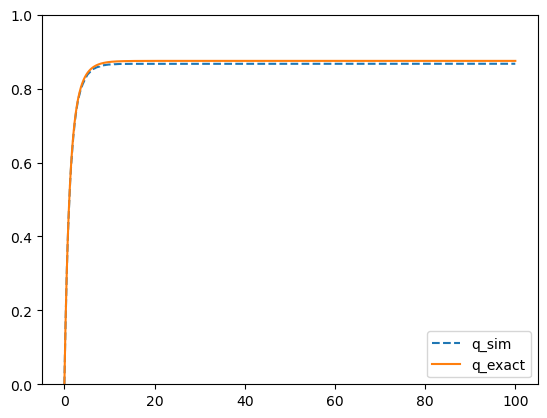

In [156]:
plt.figure()
r_hat = phats_df.iloc[idx]['r-MLE'] 
R0_hat = phats_df.iloc[idx].R0_ascertainment
beta_hat = R0_hat * gamma
print(R0_hat)
q = sp.integrate.odeint(q_deriv, q0, time, args = (beta_hat, gamma, r_hat)).flatten()
plt.plot(time, q_sim , linestyle = '--', label = "q_sim")
plt.plot(time, q, label = "q_exact")
plt.ylim([0, 1])
plt.legend()

In [372]:
# p_blarg = (1 + 1/r_hat)**(-1)

# np.random.negative_binomial(r_hat, p_blarg, size = 1000) 
# # q_sim

In [181]:
phats_df

,R0,r-MLE,p,R0_ascertainment
0,0.500000,0.190020,0.131956,1.250000
1,0.684211,0.128402,0.069824,1.710526
2,0.868421,0.104088,0.045750,2.171053
3,1.052632,0.090772,0.033343,2.631579
4,1.236842,0.082177,0.025888,3.092105
5,1.421053,0.076075,0.020965,3.552632
6,1.605263,0.071472,0.017498,4.013158
7,1.789474,0.067884,0.014947,4.473684
8,1.973684,0.064937,0.012990,4.934211
9,2.157895,0.062492,0.011451,5.394737
